## UZOP Projekt - Predicting NBA shots
#### Ana Ujević 0036534085
# Priprema i vizualizacija podataka


#### Korišteni paketi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analiza i čišćenje podataka
### Učitavanje i pregled podataka

In [5]:
X = pd.read_csv("shot_logs.csv")
#X.shape - prikaz koliko podataka ima (128069,21)
X.head() #prikaz podataka u obliku tablice



,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


### Značajke

In [6]:
X.columns.values

array(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN',
       'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'], dtype=object)

### Opis značajki
- 'GAME_ID': Jedinstveni identifikator igre.
- 'MATCHUP': Datum i informacije o protivnicima i tipu igre
- LOCATION': Mjesto na kojem se igrala utakmica (npr. "H" za domaću utakmicu i "A" za gostujuću utakmicu).
- 'W': Rezultat igre za ekipu igrača ("W" označava pobjedu, "L" označava poraz).
- 'FINAL_MARGIN': Konačna razlika u bodovima na kraju igre.
- 'SHOT_NUMBER': Redni broj šuta igrača tijekom utakmice.
- 'PERIOD': Period utakmice u kojem je šut izveden (npr. 1. četvrtina, 2. četvrtina itd.).
- 'GAME_CLOCK': Preostalo vrijeme u igri u trenutku izvođenja šuta.
- 'SHOT_CLOCK': Preostalo vrijeme u trenutku izvođenja šuta u tom napadu (napad traje 25s)
- 'DRIBBLES': Broj driblinga koje je igrač napravio prije šuta.
- 'TOUCH_TIME': Ukupno vrijeme dodira s loptom prije izvođenja šuta.
- 'SHOT_DIST': Udaljenost igrača od koša u trenutku izvođenja šuta.
- 'PTS_TYPE': Vrijednost šuta (npr. "2" za dvostruki šut i "3" za trica).
- 'SHOT_RESULT': Ishod šuta (npr. "made" za uspješan šut i "missed" za promašen šut).
- 'CLOSEST_DEFENDER': Ime najbližeg braniča protivničke momčadi.
- 'CLOSEST_DEFENDER_PLAYER_ID': Jedinstveni identifikator najbližeg braniča.
- 'CLOSE_DEF_DIST': Udaljenost između igrača i najbližeg braniča u trenutku izvođenja šuta.
- 'FGM': Oznaka za uspješan šut ("1" za uspješan šut, "0" za promašaj).
- 'PTS': Broj bodova osvojenih šutom.
- 'player_name': Ime igrača koji je izveo šut.
- 'player_id': Jedinstveni identifikator igrača koji baca
  dentifikator igrača.

In [7]:
X.info() # informacije o tipovima podataka značajki

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

### Čišćenje podataka

In [8]:
X.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


### Monotoni atributi 

- provjeravamo postoje li monotoni atributi, odnosno atributi čija vrijednost jednoliko raste

In [9]:
X.nunique() #broji jedinstvene vrijednosti po stupcima

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

- zaključujemo da su monotoni atributi: game_id, player_id i matchup te ih izbacujemo

In [10]:
X.drop(('GAME_ID'), axis=1, inplace=True)
X.drop(('player_id'), axis=1, inplace=True)
X.drop(('MATCHUP'), axis=1, inplace=True)
X.drop(('player_name'), axis=1, inplace=True)

In [11]:
#prikaz nakon izbacivanja
X.nunique() 

LOCATION                        2
W                               2
FINAL_MARGIN                   88
SHOT_NUMBER                    38
PERIOD                          7
GAME_CLOCK                    719
SHOT_CLOCK                    241
DRIBBLES                       33
TOUCH_TIME                    313
SHOT_DIST                     448
PTS_TYPE                        2
SHOT_RESULT                     2
CLOSEST_DEFENDER              473
CLOSEST_DEFENDER_PLAYER_ID    474
CLOSE_DEF_DIST                299
FGM                             2
PTS                             3
dtype: int64

### Nedostajući podaci

In [12]:
X.isna().sum() #nedostajuci podaci, u primjeru nemamo vrijednost za to

LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
dtype: int64

- vidimo da nedostaju podaci za shot_clock -> izbacujemo te zapise iz skupa podataka (5000 vs 128 000, broj primjera nije od velike vaznosti)

In [13]:
X_tmp = X.copy()
X_tmp = X_tmp.loc[X_tmp.SHOT_CLOCK.notnull(), :] ##izbacili smo primjere koji imaju vrijednost vremena koje je preostalo
X = X_tmp

In [14]:
X.isna().sum()

LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
dtype: int64

## Deskriptivna statistika podataka

- Deskriptivna statistika pruža osnovne informacije o raspodjeli, srednjim vrijednostima, varijabilnosti i drugim karakteristikama podataka
- nužna je za dobro razumijevanja dataseta te identificiranje stršećih vrijednosti, analizu raspodjele i pripremu za daljnje analize,
uključujući izradu grafova

## Stršeći podaci

In [15]:
X.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,0.252396,6.476164,2.471454,12.453344,1.989233,2.748202,13.443758,2.258363,159120.427977,4.121706,0.456156,1.005469
std,13.311418,4.681245,1.137898,5.763265,3.411188,2.957237,8.777113,0.437736,78689.677900,2.751587,0.498076,1.131129
min,-53.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,200745.000000,2.300000,0.000000,0.000000
50%,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.400000,2.000000,201949.000000,3.700000,0.000000,0.000000
75%,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.400000,3.000000,203079.000000,5.300000,1.000000,2.000000
max,53.000000,37.000000,7.000000,24.000000,32.000000,24.900000,43.500000,3.000000,530027.000000,53.200000,1.000000,3.000000


- primjećujemo da je min(Final_margin - razlika u rezultatu) ima negativnu vrijednost -> možemo znati je li domaći tim dobio ili izgubio, ali upitna je smisao zbog te nagativne vrijednosti
- touch_time ima negativnu vrijednost

# Vizualizacija podataka
## Vizualizacija stršećih vrijednosti

- vizualiziramo stršeću vrijednost za značajku TOUCH_TIME

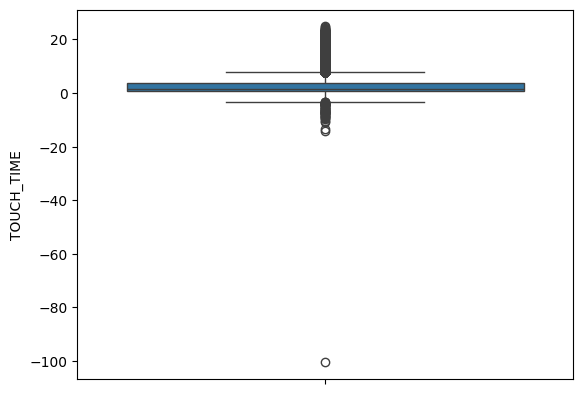

In [16]:
#'TOUCH_TIME': Ukupno vrijeme dodira s loptom prije izvođenja šuta.
sns.boxplot(X['TOUCH_TIME']) 
plt.show()

- izbacujemo sve koji imaju negativnu vrijednost ukupnog dodira s loptom prije šuta

<Axes: ylabel='TOUCH_TIME'>

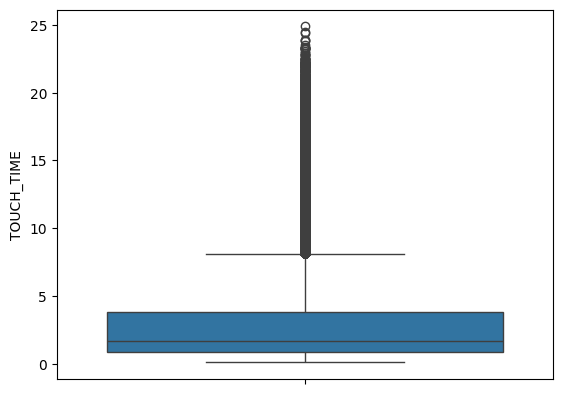

In [17]:
X = X.loc[(X.TOUCH_TIME > 0)]
sns.boxplot(X['TOUCH_TIME'])

- vizualiziramo podatke za PERIOD, odnosno period utakmice u kojem je šut izveden (npr. 1. četvrtina, 2. četvrtina itd.)

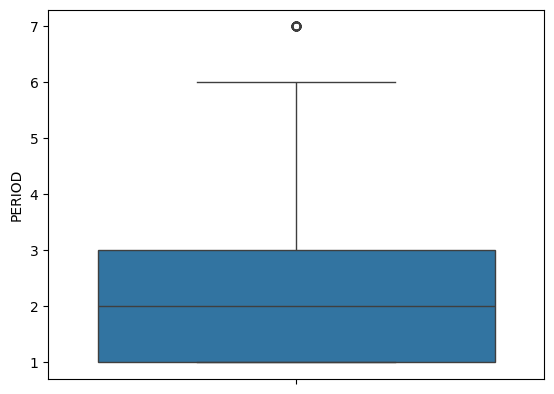

In [18]:
sns.boxplot(X['PERIOD']) 
plt.show()

## Vizualizacija korelacija

- korisno je vizualizirati korelaciju između svake značajke i ciljne varijable, kao što je 'SHOT_RESULT' ili FGM (binarna varijabla o uspješnosti bacanja)

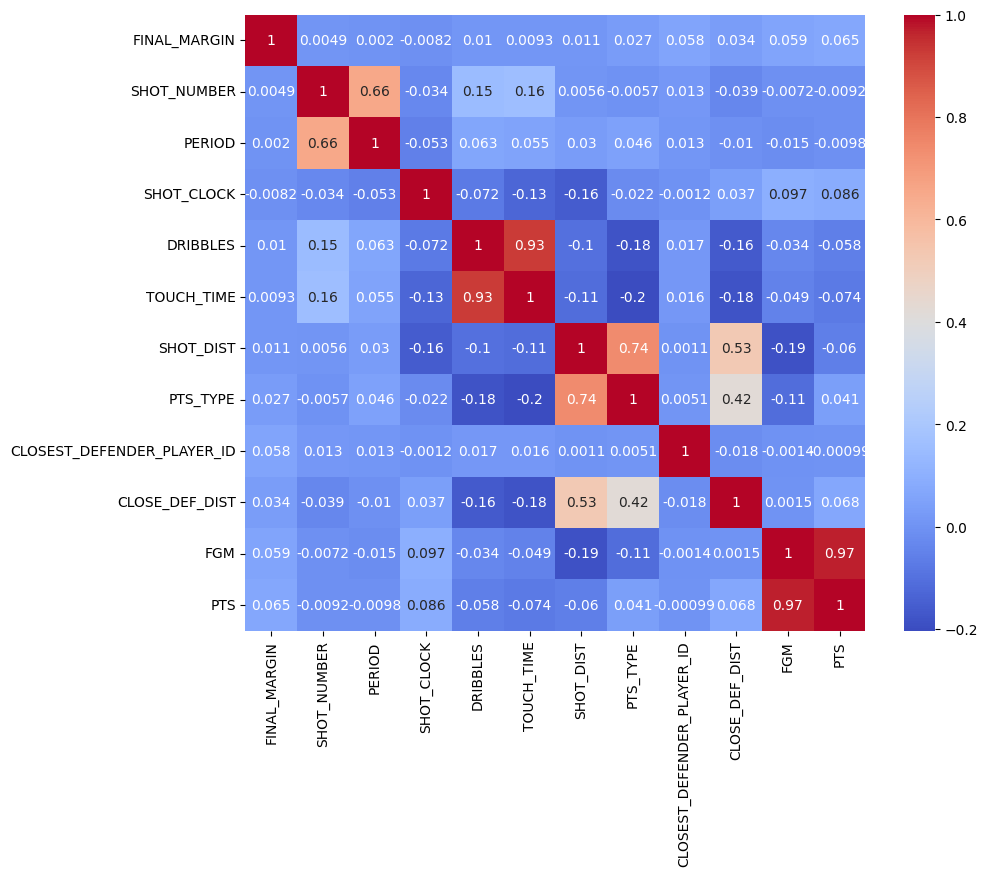

In [19]:
X_numeric = X.loc[:, ~X.columns.isin(['LOCATION', 'W', 'GAME_CLOCK', 'SHOT_RESULT', 'CLOSEST_DEFENDER'])]

# corr() funkcija za izračun korelacije između numeričkih značajki
correlation_matrix = X_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Histogrami
- možemo prikazati histograme za različite značajke

### SHOT_DISC histogram
-  prikazuje  učestalost šuteva na različitim udaljenostima od koša

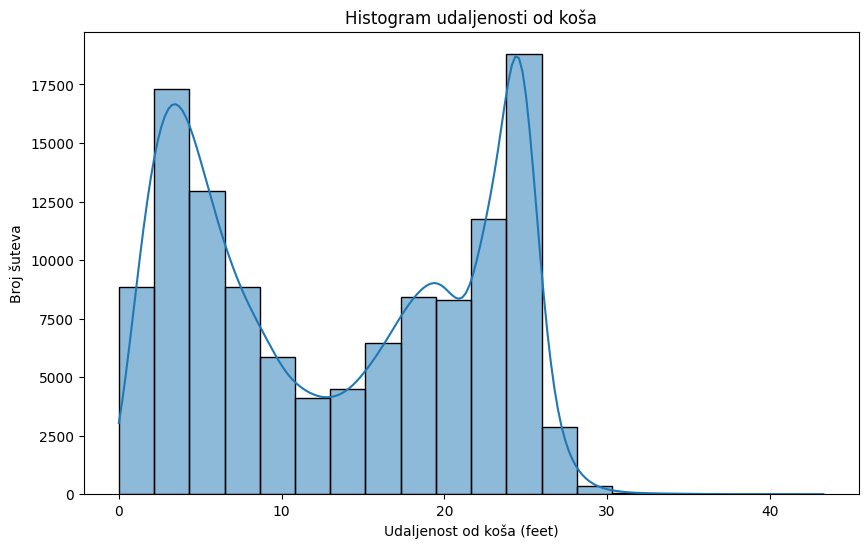

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(X['SHOT_DIST'], bins=20, kde=True)
plt.xlabel('Udaljenost od koša (feet)')
plt.ylabel('Broj šuteva')
plt.title('Histogram udaljenosti od koša')
plt.show()

### SHOT_TIME histrogram
-  histogram za 'TOUCH_TIME' koji prikazuje raspodjelu vremena koje igrači provode s loptom prije izvođenja šuta

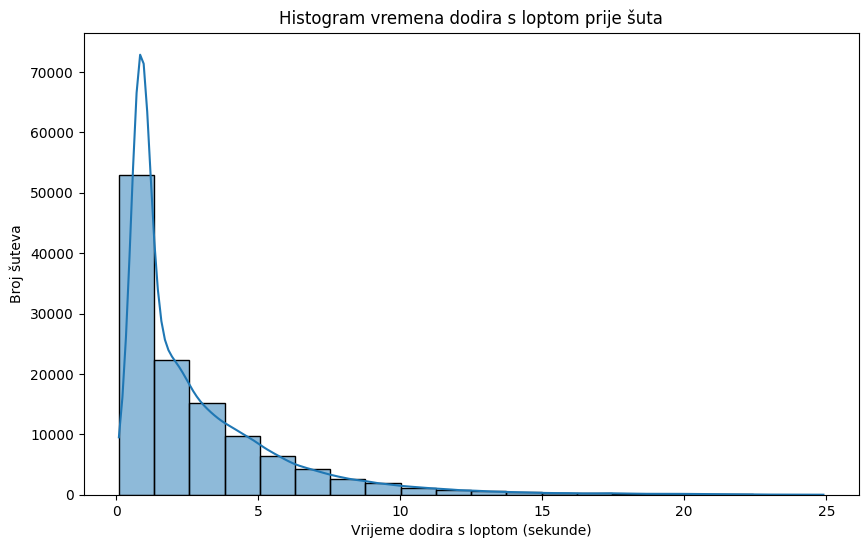

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(X['TOUCH_TIME'], bins=20, kde=True)
plt.xlabel('Vrijeme dodira s loptom (sekunde)')
plt.ylabel('Broj šuteva')
plt.title('Histogram vremena dodira s loptom prije šuta')
plt.show()

## Stupičasti dijagram
- želimo prikazat ovisnost broja pogodaka o četvrti

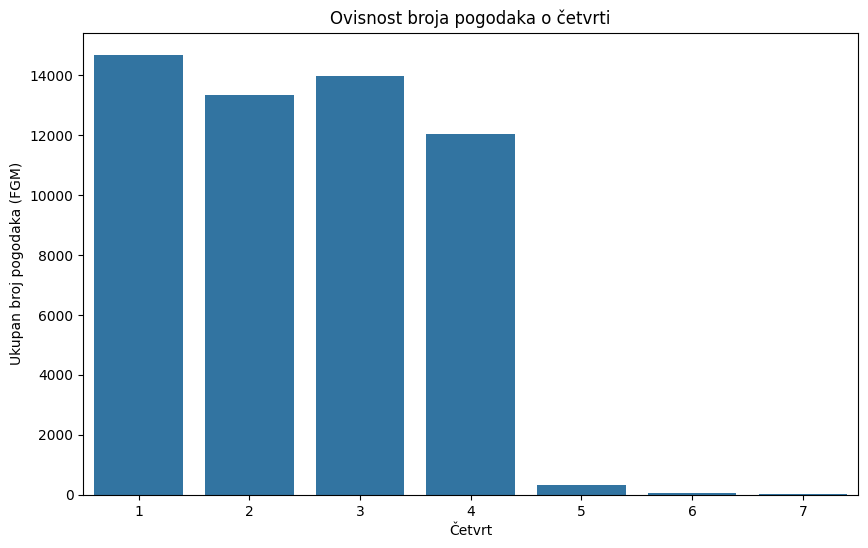

In [22]:
period_fgm = X.groupby('PERIOD')['FGM'].sum().reset_index() #Grupiranje podatke prema četvrtima i izračun ukupan broj pogodaka (FGM) u svakoj četvrti

plt.figure(figsize=(10, 6))
sns.barplot(data=period_fgm, x='PERIOD', y='FGM')
plt.xlabel('Četvrt')
plt.ylabel('Ukupan broj pogodaka (FGM)')
plt.title('Ovisnost broja pogodaka o četvrti')
plt.show()

## Linijski dijagram
- želimo prikazati raspodjelu pogodaka u odnosu na udaljenost od koša
- ovo je gore napravljeni dijagram samo na linijski način

C:\Users\Ana\AppData\Local\Temp\ipykernel_20244\3572720289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SHOT_DIST_METERS'] = X['SHOT_DIST'] * 0.3048 #pretvraamo stopala u metre


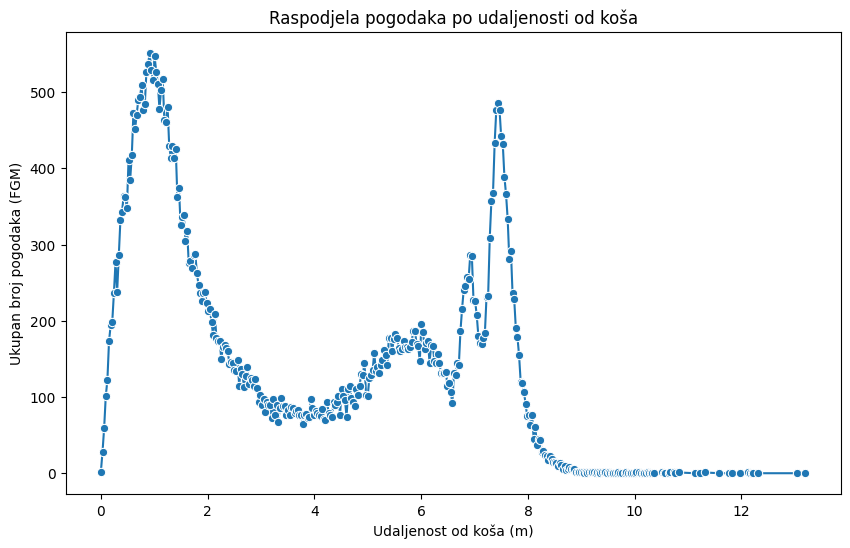

In [23]:
X['SHOT_DIST_METERS'] = X['SHOT_DIST'] * 0.3048 #pretvraamo stopala u metre
distance_fg_data = X.groupby('SHOT_DIST_METERS')['FGM'].sum().reset_index() # grupiranje podatka po udaljenosti i zatim sumirati broj pogodaka za svaku grupu

plt.figure(figsize=(10, 6))
sns.lineplot(data=distance_fg_data, x='SHOT_DIST_METERS', y='FGM', marker='o')
plt.xlabel('Udaljenost od koša (m)')
plt.ylabel('Ukupan broj pogodaka (FGM)')
plt.title('Raspodjela pogodaka po udaljenosti od koša')
plt.show()

## Matrica dijagrama raspršenja

In [24]:
#sns.set(rc={'figure.figsize':(25,15)})
#sns.pairplot(X.loc[:,['FINAL_MARGIN', 'SHOT_NUMBER', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'SHOT_RESULT']], hue="SHOT_RESULT", corner=True)
#plt.show()

## Zadnji pregled pogodataka
- U znanstvenom radu piše da su FGM i PTS savršeni prediktori shot resulta što znači da možemo izbaciti bilo koje dvije od te
tri značajke za daljni rad s modelom

In [25]:
X.drop(('FGM'), axis=1, inplace=True)
X.drop(('PTS'), axis=1, inplace=True)
X.drop(('PTS_TYPE'), axis=1, inplace=True) #izbacujem jer direktno ovisi o SHOT_DIST

C:\Users\Ana\AppData\Local\Temp\ipykernel_20244\3251842719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(('FGM'), axis=1, inplace=True)
C:\Users\Ana\AppData\Local\Temp\ipykernel_20244\3251842719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(('PTS'), axis=1, inplace=True)
C:\Users\Ana\AppData\Local\Temp\ipykernel_20244\3251842719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(('PTS_TYPE'), axis=1, i

In [26]:
X. describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,SHOT_DIST_METERS
count,119386.000000,119386.000000,119386.000000,119386.00000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.257945,6.471027,2.471111,12.32351,2.041094,2.824904,13.614446,159206.344814,4.145090,4.149683
std,13.312160,4.682672,1.138258,5.66551,3.440073,2.938674,8.738203,78610.548741,2.741207,2.663404
min,-53.000000,1.000000,1.000000,0.00000,0.000000,0.100000,0.000000,708.000000,0.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.10000,0.000000,0.900000,4.900000,200745.000000,2.300000,1.493520
50%,1.000000,5.000000,2.000000,12.20000,1.000000,1.700000,13.900000,201949.000000,3.700000,4.236720
75%,9.000000,9.000000,3.000000,16.40000,3.000000,3.800000,22.500000,203079.000000,5.300000,6.858000
max,53.000000,37.000000,7.000000,24.00000,32.000000,24.900000,43.300000,530027.000000,53.200000,13.197840


# Replikacija rezultata

### - dodatno čićenje

In [27]:
#Convert game clock to seconds
#X['GAME_CLOCK'] = X['GAME_CLOCK'].apply(
  #  lambda x: 60*int(x.split(':')[0]) + int(x.split(':')[1]))

In [28]:
X.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,SHOT_DIST_METERS
count,119386.000000,119386.000000,119386.000000,119386.00000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.257945,6.471027,2.471111,12.32351,2.041094,2.824904,13.614446,159206.344814,4.145090,4.149683
std,13.312160,4.682672,1.138258,5.66551,3.440073,2.938674,8.738203,78610.548741,2.741207,2.663404
min,-53.000000,1.000000,1.000000,0.00000,0.000000,0.100000,0.000000,708.000000,0.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.10000,0.000000,0.900000,4.900000,200745.000000,2.300000,1.493520
50%,1.000000,5.000000,2.000000,12.20000,1.000000,1.700000,13.900000,201949.000000,3.700000,4.236720
75%,9.000000,9.000000,3.000000,16.40000,3.000000,3.800000,22.500000,203079.000000,5.300000,6.858000
max,53.000000,37.000000,7.000000,24.00000,32.000000,24.900000,43.300000,530027.000000,53.200000,13.197840


## 1. Logistička regresija

- Logistička regresija generira linearni set težina θ
- Mičem kategoričke varijable koje imaju više od dvije kategorije - to uključuje "GAME ID", "MATCHUP", "CLOSEST DEFENDER", "CLOSEST DEFENDER PLAYER ID", 
"player name" i "player id". Razlog je što kada sam zamijenila kategorije s cjelobrojnim vrijednostima te 
bi mogle zbuniti model koji pokušava naučiti linearne težine.

In [83]:
print(X.columns)

Index(['LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK',
       'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'SHOT_DIST_METERS'],
      dtype='object')


In [84]:
# Pretvaranje varijable X u DataFrame T
T = pd.DataFrame(X)

In [85]:
print(T.columns)

Index(['LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK',
       'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'SHOT_DIST_METERS'],
      dtype='object')


In [86]:
# Uklanjanje određenih stupaca iz tablice
columns_to_drop = ['CLOSEST_DEFENDER_PLAYER_ID']
T = T.drop(columns=columns_to_drop)
T.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSE_DEF_DIST,SHOT_DIST_METERS
count,119386.000000,119386.000000,119386.000000,119386.00000,119386.000000,119386.000000,119386.000000,119386.0,119386.000000,119386.000000
mean,0.257945,6.471027,2.471111,12.32351,2.041094,2.824904,13.614446,-1.0,4.145090,4.149683
std,13.312160,4.682672,1.138258,5.66551,3.440073,2.938674,8.738203,0.0,2.741207,2.663404
min,-53.000000,1.000000,1.000000,0.00000,0.000000,0.100000,0.000000,-1.0,0.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.10000,0.000000,0.900000,4.900000,-1.0,2.300000,1.493520
50%,1.000000,5.000000,2.000000,12.20000,1.000000,1.700000,13.900000,-1.0,3.700000,4.236720
75%,9.000000,9.000000,3.000000,16.40000,3.000000,3.800000,22.500000,-1.0,5.300000,6.858000
max,53.000000,37.000000,7.000000,24.00000,32.000000,24.900000,43.300000,-1.0,53.200000,13.197840


In [33]:
T.head()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSEST_DEFENDER,CLOSE_DEF_DIST,SHOT_DIST_METERS
0,A,W,24,1,1,1:09,10.8,2,1.9,7.7,made,"Anderson, Alan",1.3,2.34696
1,A,W,24,2,1,0:14,3.4,0,0.8,28.2,missed,"Bogdanovic, Bojan",6.1,8.59536
3,A,W,24,4,2,11:47,10.3,2,1.9,17.2,missed,"Brown, Markel",3.4,5.24256
4,A,W,24,5,2,10:34,10.9,2,2.7,3.7,missed,"Young, Thaddeus",1.1,1.12776
5,A,W,24,6,2,8:15,9.1,2,4.4,18.4,missed,"Williams, Deron",2.6,5.60832


In [87]:
# Pretvaranje vremena u sekunde
def calc_secs(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return (12 * 60 - 60 * hours + minutes)

T['PERIOD'] = (T['PERIOD'] - 1) * (12 * 60)
T['GAME_CLOCK'] = T['GAME_CLOCK'].apply(calc_secs)
T['GAME_TIME'] = T['PERIOD'] + T['GAME_CLOCK']
T = T.drop(columns=['PERIOD', 'GAME_CLOCK', 'CLOSEST_DEFENDER' ])

# Pretvaranje kategoričkih varijabli u numeričke
T['LOCATION'] = T['LOCATION'].apply(lambda x: 1 if x == 'A' else -1)
T['W'] = T['W'].apply(lambda x: 1 if x == 'W' else -1)
T['SHOT_RESULT'] = T['SHOT_RESULT'].apply(lambda x: 1 if x == 'made' else -1)

In [35]:
T.head()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSE_DEF_DIST,SHOT_DIST_METERS,GAME_TIME
0,1,1,24,1,10.8,2,1.9,7.7,1,1.3,2.34696,669
1,1,1,24,2,3.4,0,0.8,28.2,-1,6.1,8.59536,734
3,1,1,24,4,10.3,2,1.9,17.2,-1,3.4,5.24256,827
4,1,1,24,5,10.9,2,2.7,3.7,-1,1.1,1.12776,874
5,1,1,24,6,9.1,2,4.4,18.4,-1,2.6,5.60832,975


- kombinirala sam značajku PERIOD i GAME_CLOCK  u jednu značajku: "UKUPNO VRIJEME IGRE". 
- "GAME CLOCK" značajka odbrojava i resetira se nakon svakog perioda, ali ona mora biti takva da razlikuje 10 sekundi preostalih u prvom periodu
od 10 sekundi preostalih u četvrtom periodu ( kada su igrači umorniji i možda skloniji promašiti šut).


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Provjera postojanja kolone 'SHOT_RESULT'
if 'SHOT_RESULT' in T.columns:
    # Izdvajanje stupca SHOT_RESULT u varijablu y
    y = T['SHOT_RESULT']

    # Makni stupac SHOT_RESULT iz dataseta T
    T.drop(columns=['SHOT_RESULT'], inplace=True)

    # Provjera nedostajućih vrednosti u podacima
    if T.isnull().values.any() or y.isnull().values.any():
        print("Postoje nedostajuće vrednosti u podacima")
    else:
        # Podijeli podatke T i y u omjeru 50:50 za trening i test skup
        T_train, T_test, Y_train, Y_test = train_test_split(T, y, test_size=0.5, random_state=42)

        # Inicijalizacija i treniranje modela s regularizacijom lambda=0.001
        clf = LogisticRegression(C=1/0.001)
        clf.fit(T_train, Y_train)

        # Predviđanje na testnom skupu
        predictions = clf.predict(T_test)

        # Računanje confusion matrix
        cm = confusion_matrix(Y_test, predictions)
        print("Confusion Matrix:")
        print(cm)

        # Računanje accuracy score
        accuracy = accuracy_score(Y_test, predictions)
        print("Accuracy Score:", accuracy)
else:
    print("Kolona 'SHOT_RESULT' nije pronađena")

Confusion Matrix:
[[23454  9018]
 [14568 12653]]
Accuracy Score: 0.6048782939373126


## 2. Naivni Bayesov klasifikator

- Naivni Bayes je relativno jednostavan algoritam koji pretpostavlja da su osobine xi uvjetno nezavisne uz uvjet y
- Podatke kontinuiranih vrijedosti podijeljene su u 4 kategorije:
    - vise od 1 standardna devijacija ispod prosjeka
    - 1 standardna devijacija ispod prosjeka
    - 1 standardna devijacija iznad prosjeka,
    - vise od 1 standardna devijacija iznad prosjeka. 
- Nažalost, ta podjela nije pokazala primjetnu razliku u rezultatima koristeći Naivni Bayes.
- Binning -> Ova funkcija radi s kontinuiranim podacima poput brojeva, primjerice, duljina šuteva u
  košarci ili vrijeme provedeno s loptom. Ona uzima te brojeve i sortira ih u četiri kategorije kako bi Naivni Bayes model mogao bolje razumjeti i naučiti iz tih grupa umjesto iz točnih vrijednosti.




In [37]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Podaci su već definirani u varijablama T i y
# T i y su vaši stvarni podaci koje želite podijeliti na trening i test skupove

# Podijela podataka na trening i test skupove
T_train, T_test, Y_train, Y_test = train_test_split(T, y, test_size=0.5)

# Funkcija za biniranje kontinuiranih varijabli u 4 kategorije

def bin_continuous_data(data):
    data_abs = np.abs(data)
    means = np.mean(data_abs, axis=0)
    stds = np.std(data_abs, axis=0)

    boundaries = np.array([means - stds, means - 0.5 * stds, means + 0.5 * stds, means + stds])

    categories = np.zeros_like(data, dtype=int)
    for i in range(data.shape[1]):
        for j in range(4):
            categories[:, i] += (data[:, i] > boundaries[j, i])

    return categories

# Binarizacija podataka
T_train_binned = bin_continuous_data(T_train.values)
T_test_binned = bin_continuous_data(T_test.values)

# Treniranje multinomijalnog Naivnog Bayesa
clf = MultinomialNB(alpha=1.0)
clf.fit(T_train_binned, Y_train)

# Cross-validation
scores = cross_val_score(clf, T_train_binned, Y_train, cv=5)
print("Cross-validation scores:", scores)

# Predviđanje na testnom skupu
predictions = clf.predict(T_test_binned)

# Računanje točnosti
accuracy = accuracy_score(Y_test, predictions)
print('Test accuracy:', accuracy)


conf_matrix = confusion_matrix(Y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)

Cross-validation scores: [0.59686741 0.59184186 0.60314934 0.60026805 0.59666611]
Test accuracy: 0.5970549310639438
Confusion Matrix:
[[21985 10579]
 [13474 13655]]


## 3. Random Forest klasifikator

- Random Forest klasiifikator dobro obrađuju kategoričke podatke zbog prirode stabala odlučivanja.
Također je otporan  na prenaučenost jer koristi više stabala odlučivanja za klasifikaciju podataka.
- algoritam ansambla koji nasumično bira podskup značajki, stvara optimalno stablo odlučivanja od tih značajki, zatim ponavlja proces s novim podskupovima značajki kako bi na kraju stvorio "šumu" stabala odlučivanja

In [103]:
Z = pd.read_csv("shot_logs.csv")
Z.drop(('GAME_ID'), axis=1, inplace=True)
Z.drop(('player_id'), axis=1, inplace=True)
Z.drop(('MATCHUP'), axis=1, inplace=True)
Z.drop(('player_name'), axis=1, inplace=True)

X_tmp = Z.copy()
X_tmp = X_tmp.loc[X_tmp.SHOT_CLOCK.notnull(), :] ##izbacili smo primjere koji imaju vrijednost vremena koje je preostalo
Z = X_tmp

Z.drop(('FGM'), axis=1, inplace=True)
Z.drop(('PTS'), axis=1, inplace=True)
Z.drop(('PTS_TYPE'), axis=1, inplace=True) #izbacujem jer direktno ovisi o SHOT_DIST

T = pd.DataFrame(Z)
T.columns
# Uklanjanje određenih stupaca iz tablice
columns_to_drop = ['CLOSEST_DEFENDER_PLAYER_ID']
T = T.drop(columns=columns_to_drop)
T.describe()
# Pretvaranje vremena u sekunde
def calc_secs(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return (12 * 60 - 60 * hours + minutes)

T['PERIOD'] = (T['PERIOD'] - 1) * (12 * 60)
T['GAME_CLOCK'] = T['GAME_CLOCK'].apply(calc_secs)
T['GAME_TIME'] = T['PERIOD'] + T['GAME_CLOCK']
T = T.drop(columns=['PERIOD', 'GAME_CLOCK', 'CLOSEST_DEFENDER' ])

# Pretvaranje kategoričkih varijabli u numeričke
T['LOCATION'] = T['LOCATION'].apply(lambda x: 1 if x == 'A' else -1)
T['W'] = T['W'].apply(lambda x: 1 if x == 'W' else -1)
T['SHOT_RESULT'] = T['SHOT_RESULT'].map({'made': 1, 'missed': -1})
T

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSE_DEF_DIST,GAME_TIME
0,1,1,24,1,10.8,2,1.9,7.7,1,1.3,669
1,1,1,24,2,3.4,0,0.8,28.2,-1,6.1,734
3,1,1,24,4,10.3,2,1.9,17.2,-1,3.4,827
4,1,1,24,5,10.9,2,2.7,3.7,-1,1.1,874
5,1,1,24,6,9.1,2,4.4,18.4,-1,2.6,975
...,...,...,...,...,...,...,...,...,...,...,...
128063,1,-1,-16,4,15.3,2,1.6,8.9,1,5.7,1145
128064,1,-1,-16,5,18.3,5,6.2,8.7,-1,0.8,2152
128065,1,-1,-16,6,19.8,4,5.2,0.6,1,0.6,2248
128066,1,-1,-16,7,23.0,2,4.2,16.9,1,4.2,2230


In [104]:
T

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSE_DEF_DIST,GAME_TIME
0,1,1,24,1,10.8,2,1.9,7.7,1,1.3,669
1,1,1,24,2,3.4,0,0.8,28.2,-1,6.1,734
3,1,1,24,4,10.3,2,1.9,17.2,-1,3.4,827
4,1,1,24,5,10.9,2,2.7,3.7,-1,1.1,874
5,1,1,24,6,9.1,2,4.4,18.4,-1,2.6,975
...,...,...,...,...,...,...,...,...,...,...,...
128063,1,-1,-16,4,15.3,2,1.6,8.9,1,5.7,1145
128064,1,-1,-16,5,18.3,5,6.2,8.7,-1,0.8,2152
128065,1,-1,-16,6,19.8,4,5.2,0.6,1,0.6,2248
128066,1,-1,-16,7,23.0,2,4.2,16.9,1,4.2,2230


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, accuracy_score

# Provjera postojanja kolone 'SHOT_RESULT'
if 'SHOT_RESULT' in T.columns:
    # Izdvajanje stupca SHOT_RESULT u varijablu y
    y = T['SHOT_RESULT']

    # Makni stupac SHOT_RESULT iz dataseta T
    T.drop(columns=['SHOT_RESULT'], inplace=True)

    # Provjera nedostajućih vrednosti u podacima
    if T.isnull().values.any() or y.isnull().values.any():
        print("Postoje nedostajuće vrednosti u podacima")
    else:
        # Podijeli podatke T i y u omjeru 50:50 za trening i test skup
        T_train, T_test, Y_train, Y_test = train_test_split(T, y, test_size=0.5, random_state=42)

        clf = RandomForestClassifier()
        clf.fit(T_train, Y_train)

        # Predviđanje na testnom skupu
        predictions = clf.predict(T_test)

        # Računanje confusion matrix
        cm = confusion_matrix(Y_test, predictions)
        print("Confusion Matrix:")
        print(cm)

        # Računanje accuracy score
        accuracy = accuracy_score(Y_test, predictions)
        print("Accuracy Score:", accuracy)
else:
    print("Kolona 'SHOT_RESULT' nije pronađena")

Confusion Matrix:
[[25159  8211]
 [16350 11531]]
Accuracy Score: 0.5990106283979038


## 4. SVM

In [107]:
Z = pd.read_csv("shot_logs.csv")
Z.drop(('GAME_ID'), axis=1, inplace=True)
Z.drop(('player_id'), axis=1, inplace=True)
Z.drop(('MATCHUP'), axis=1, inplace=True)
Z.drop(('player_name'), axis=1, inplace=True)

X_tmp = Z.copy()
X_tmp = X_tmp.loc[X_tmp.SHOT_CLOCK.notnull(), :] ##izbacili smo primjere koji imaju vrijednost vremena koje je preostalo
Z = X_tmp

Z.drop(('FGM'), axis=1, inplace=True)
Z.drop(('PTS'), axis=1, inplace=True)
Z.drop(('PTS_TYPE'), axis=1, inplace=True) #izbacujem jer direktno ovisi o SHOT_DIST

T = pd.DataFrame(Z)
T.columns
# Uklanjanje određenih stupaca iz tablice
columns_to_drop = ['CLOSEST_DEFENDER_PLAYER_ID']
T = T.drop(columns=columns_to_drop)
T.describe()
# Pretvaranje vremena u sekunde
def calc_secs(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return (12 * 60 - 60 * hours + minutes)

T['PERIOD'] = (T['PERIOD'] - 1) * (12 * 60)
T['GAME_CLOCK'] = T['GAME_CLOCK'].apply(calc_secs)
T['GAME_TIME'] = T['PERIOD'] + T['GAME_CLOCK']
T = T.drop(columns=['PERIOD', 'GAME_CLOCK', 'CLOSEST_DEFENDER' ])

# Pretvaranje kategoričkih varijabli u numeričke
T['LOCATION'] = T['LOCATION'].apply(lambda x: 1 if x == 'A' else -1)
T['W'] = T['W'].apply(lambda x: 1 if x == 'W' else -1)
T['SHOT_RESULT'] = T['SHOT_RESULT'].map({'made': 1, 'missed': -1})
T

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSE_DEF_DIST,GAME_TIME
0,1,1,24,1,10.8,2,1.9,7.7,1,1.3,669
1,1,1,24,2,3.4,0,0.8,28.2,-1,6.1,734
3,1,1,24,4,10.3,2,1.9,17.2,-1,3.4,827
4,1,1,24,5,10.9,2,2.7,3.7,-1,1.1,874
5,1,1,24,6,9.1,2,4.4,18.4,-1,2.6,975
...,...,...,...,...,...,...,...,...,...,...,...
128063,1,-1,-16,4,15.3,2,1.6,8.9,1,5.7,1145
128064,1,-1,-16,5,18.3,5,6.2,8.7,-1,0.8,2152
128065,1,-1,-16,6,19.8,4,5.2,0.6,1,0.6,2248
128066,1,-1,-16,7,23.0,2,4.2,16.9,1,4.2,2230


In [108]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

# Provjera postojanja kolone 'SHOT_RESULT'
if 'SHOT_RESULT' in T.columns:
    # Izdvajanje stupca SHOT_RESULT u varijablu y
    y = T['SHOT_RESULT']

    # Makni stupac SHOT_RESULT iz dataseta T
    T.drop(columns=['SHOT_RESULT'], inplace=True)

    # Provjera nedostajućih vrednosti u podacima
    if T.isnull().values.any() or y.isnull().values.any():
        print("Postoje nedostajuće vrednosti u podacima")
    else:
        # Podijeli podatke T i y u omjeru 50:50 za trening i test skup
        T_train, T_test, Y_train, Y_test = train_test_split(T, y, test_size=0.5, random_state=42)

        clf = make_pipeline(StandardScaler(),LinearSVC(dual=False, random_state=0, tol=1e-5))
        clf.fit(T_train, Y_train)

        # Predviđanje na testnom skupu
        predictions = clf.predict(T_test)

        # Računanje confusion matrix
        cm = confusion_matrix(Y_test, predictions)
        print("Confusion Matrix:")
        print(cm)

        # Računanje accuracy score
        accuracy = accuracy_score(Y_test, predictions)
        print("Accuracy Score:", accuracy)
else:
    print("Kolona 'SHOT_RESULT' nije pronađena")

Confusion Matrix:
[[23799  9571]
 [14535 13346]]
Accuracy Score: 0.6064390785456564


## 5. Neuralne mreže

In [116]:
Z = pd.read_csv("shot_logs.csv")
Z.drop(('GAME_ID'), axis=1, inplace=True)
Z.drop(('player_id'), axis=1, inplace=True)
Z.drop(('MATCHUP'), axis=1, inplace=True)
Z.drop(('player_name'), axis=1, inplace=True)

X_tmp = Z.copy()
X_tmp = X_tmp.loc[X_tmp.SHOT_CLOCK.notnull(), :] ##izbacili smo primjere koji imaju vrijednost vremena koje je preostalo
Z = X_tmp

Z.drop(('FGM'), axis=1, inplace=True)
Z.drop(('PTS'), axis=1, inplace=True)
Z.drop(('PTS_TYPE'), axis=1, inplace=True) #izbacujem jer direktno ovisi o SHOT_DIST

T = pd.DataFrame(Z)
T.columns
# Uklanjanje određenih stupaca iz tablice
columns_to_drop = ['CLOSEST_DEFENDER_PLAYER_ID']
T = T.drop(columns=columns_to_drop)
T.describe()
# Pretvaranje vremena u sekunde
def calc_secs(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return (12 * 60 - 60 * hours + minutes)

T['PERIOD'] = (T['PERIOD'] - 1) * (12 * 60)
T['GAME_CLOCK'] = T['GAME_CLOCK'].apply(calc_secs)
T['GAME_TIME'] = T['PERIOD'] + T['GAME_CLOCK']
T = T.drop(columns=['PERIOD', 'GAME_CLOCK', 'CLOSEST_DEFENDER' ])

# Pretvaranje kategoričkih varijabli u numeričke
T['LOCATION'] = T['LOCATION'].apply(lambda x: 1 if x == 'A' else -1)
T['W'] = T['W'].apply(lambda x: 1 if x == 'W' else -1)
T['SHOT_RESULT'] = T['SHOT_RESULT'].map({'made': 1, 'missed': -1})
T

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSE_DEF_DIST,GAME_TIME
0,1,1,24,1,10.8,2,1.9,7.7,1,1.3,669
1,1,1,24,2,3.4,0,0.8,28.2,-1,6.1,734
3,1,1,24,4,10.3,2,1.9,17.2,-1,3.4,827
4,1,1,24,5,10.9,2,2.7,3.7,-1,1.1,874
5,1,1,24,6,9.1,2,4.4,18.4,-1,2.6,975
...,...,...,...,...,...,...,...,...,...,...,...
128063,1,-1,-16,4,15.3,2,1.6,8.9,1,5.7,1145
128064,1,-1,-16,5,18.3,5,6.2,8.7,-1,0.8,2152
128065,1,-1,-16,6,19.8,4,5.2,0.6,1,0.6,2248
128066,1,-1,-16,7,23.0,2,4.2,16.9,1,4.2,2230


In [117]:
y = T['SHOT_RESULT']

# Makni stupac SHOT_RESULT iz dataseta T
T.drop(columns=['SHOT_RESULT'], inplace=True)

In [118]:
#Treniranje modela

# standardizacija
scaler = StandardScaler()
scaler.fit(T)
T = scaler.transform(T)
T

array([[ 0.99895566,  0.98544493,  1.78400989, ..., -0.65440435,
        -1.02548721, -0.95249048],
       [ 0.99895566,  0.98544493,  1.78400989, ...,  1.68122504,
         0.71896774, -0.87592992],
       [ 0.99895566,  0.98544493,  1.78400989, ...,  0.42796049,
        -0.26228817, -0.76638943],
       ...,
       [ 0.99895566, -1.01477005, -1.22094148, ..., -1.46332966,
        -1.27988689,  0.90734217],
       [ 0.99895566, -1.01477005, -1.22094148, ...,  0.39378055,
         0.02845433,  0.88614079],
       [ 0.99895566, -1.01477005, -1.22094148, ...,  0.55328695,
        -0.40765941,  1.55398443]])

In [120]:
T

array([[ 0.99895566,  0.98544493,  1.78400989, ..., -0.65440435,
        -1.02548721, -0.95249048],
       [ 0.99895566,  0.98544493,  1.78400989, ...,  1.68122504,
         0.71896774, -0.87592992],
       [ 0.99895566,  0.98544493,  1.78400989, ...,  0.42796049,
        -0.26228817, -0.76638943],
       ...,
       [ 0.99895566, -1.01477005, -1.22094148, ..., -1.46332966,
        -1.27988689,  0.90734217],
       [ 0.99895566, -1.01477005, -1.22094148, ...,  0.39378055,
         0.02845433,  0.88614079],
       [ 0.99895566, -1.01477005, -1.22094148, ...,  0.55328695,
        -0.40765941,  1.55398443]])

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


relu_scores = np.array([])
sigmoid_scores = np.array([])


T_train, T_test, Y_train, Y_test = train_test_split(T, y, stratify=y)

# default alpha je 0.0001
clf_relu = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[50], alpha=0.001).fit(T_train, Y_train) # RELU aktivacijska funkcija
clf_sigmoid = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[50], activation="logistic", alpha=0.001).fit(T_train, Y_train) # RELU aktivacijska funkcija!

relu_scores = np.append(relu_scores, clf_relu.score(T_test, Y_test))
sigmoid_scores = np.append(sigmoid_scores, clf_sigmoid.score(T_test, Y_test))

print(f"relu_scores average: {np.average(relu_scores)}")
print(f"sigmoid_scores average: {np.average(sigmoid_scores)}")

T_train, T_test, Y_train, Y_test = train_test_split(T, y, stratify=y, test_size=0.1) 
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[50], activation="logistic").fit(T_train, Y_train) 
y_pred = clf.predict(T_test)
print(confusion_matrix(Y_test,y_pred))
print(clf.score(T_test, Y_test))

relu_scores average: 0.6143146346241756
sigmoid_scores average: 0.6134983347482531
[[5383 1280]
 [3580 2008]]
0.6032976899844911


## 6. XGBOOST

In [13]:
Z = pd.read_csv("shot_logs.csv")
Z.drop(('GAME_ID'), axis=1, inplace=True)
Z.drop(('player_id'), axis=1, inplace=True)
Z.drop(('MATCHUP'), axis=1, inplace=True)
Z.drop(('player_name'), axis=1, inplace=True)

X_tmp = Z.copy()
X_tmp = X_tmp.loc[X_tmp.SHOT_CLOCK.notnull(), :] ##izbacili smo primjere koji imaju vrijednost vremena koje je preostalo
Z = X_tmp

Z.drop(('FGM'), axis=1, inplace=True)
Z.drop(('PTS'), axis=1, inplace=True)
Z.drop(('PTS_TYPE'), axis=1, inplace=True) #izbacujem jer direktno ovisi o SHOT_DIST

T = pd.DataFrame(Z)
T.columns
# Uklanjanje određenih stupaca iz tablice
columns_to_drop = ['CLOSEST_DEFENDER_PLAYER_ID']
T = T.drop(columns=columns_to_drop)
T.describe()
# Pretvaranje vremena u sekunde
def calc_secs(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return (12 * 60 - 60 * hours + minutes)

T['PERIOD'] = (T['PERIOD'] - 1) * (12 * 60)
T['GAME_CLOCK'] = T['GAME_CLOCK'].apply(calc_secs)
T['GAME_TIME'] = T['PERIOD'] + T['GAME_CLOCK']
T = T.drop(columns=['PERIOD', 'GAME_CLOCK', 'CLOSEST_DEFENDER' ])

# Pretvaranje kategoričkih varijabli u numeričke
T['LOCATION'] = T['LOCATION'].apply(lambda x: 1 if x == 'A' else -1)
T['W'] = T['W'].apply(lambda x: 1 if x == 'W' else -1)
T['SHOT_RESULT'] = T['SHOT_RESULT'].map({'made': 1, 'missed': 0})
T = T.drop(columns=['LOCATION',	'W', 'FINAL_MARGIN', 'SHOT_NUMBER', 'DRIBBLES', 'GAME_TIME' ])
T

,SHOT_CLOCK,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSE_DEF_DIST
0,10.8,1.9,7.7,1,1.3
1,3.4,0.8,28.2,0,6.1
3,10.3,1.9,17.2,0,3.4
4,10.9,2.7,3.7,0,1.1
5,9.1,4.4,18.4,0,2.6
...,...,...,...,...,...
128063,15.3,1.6,8.9,1,5.7
128064,18.3,6.2,8.7,0,0.8
128065,19.8,5.2,0.6,1,0.6
128066,23.0,4.2,16.9,1,4.2


In [14]:

# Pretvaranje negativnih vrijednosti u NaN
T.loc[T['TOUCH_TIME'] < 0, 'TOUCH_TIME'] = np.nan

# Dropanje redova s NaN vrijednostima u stupcu TOUCH_TIME
T.dropna(subset=['TOUCH_TIME'], inplace=True)

y = T['SHOT_RESULT']

# Makni stupac SHOT_RESULT iz dataseta T
T.drop(columns=['SHOT_RESULT'], inplace=True)

In [128]:
T.describe()

,SHOT_CLOCK,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST
count,122203.000000,122203.000000,122203.000000,122203.000000
mean,12.450301,2.759785,13.449139,4.122839
std,5.756509,2.935379,8.776124,2.751535
min,0.000000,0.000000,0.000000,0.000000
25%,8.200000,0.900000,4.700000,2.300000
50%,12.300000,1.600000,13.400000,3.700000
75%,16.600000,3.700000,22.400000,5.300000
max,24.000000,24.900000,43.500000,53.200000


In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_score
from sklearn.model_selection import train_test_split

#izvori koje sam koristila
# https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn
# https://www.kaggle.com/code/pablocastilla/predict-if-a-shot-is-made

T_train, T_test, Y_train, Y_test = train_test_split(T, y, stratify=y, test_size=0.1)

xgb_model = XGBClassifier(objective="binary:logistic").fit(T_train, Y_train)

y_pred = xgb_model.predict(T_test)

print(confusion_matrix(Y_test, y_pred))
print(precision_score(Y_test, y_pred))

[[5466 1176]
 [3552 2027]]
0.6328442085544802


## Optimizacija hiperparametara
- cilj nam je postici accuracy bliže 68%

In [17]:
from sklearn.model_selection import GridSearchCV

#pretraživanje rešetke
T_train, T_test, Y_train, Y_test = train_test_split(T, y, stratify=y, test_size=0.5)
T_validation, T_test, Y_validation, Y_test = train_test_split(T, y, test_size=0.5, random_state=42)

parameters_for_testing = {
    'min_child_weight':[0.0001,0.001,0.01],
    'eta':[0.00001,0.0001,0.001],
    'n_estimators':[1,3,5,10],
    'max_depth':[3,4]
}

xgb = XGBClassifier(objective="binary:logistic")

grid_search = GridSearchCV(estimator = xgb, param_grid = parameters_for_testing, scoring='accuracy')
grid_search.fit(T_train, Y_train)

print(f'najbolji parametri {grid_search.best_params_}')
print(f'najbolji score {grid_search.best_score_}')

najbolji parametri {'eta': 1e-05, 'max_depth': 3, 'min_child_weight': 0.0001, 'n_estimators': 1}
najbolji score 0.543509926502247
